In [47]:
import numpy as np
import matplotlib.pyplot as plt
# import tensorflow as tf
# from tcn import TCN
from ecgdetectors import Detectors
from scipy.signal import find_peaks, decimate, envelope, correlate
from scipy.io import wavfile

In [31]:
help(find_peaks)

Help on function find_peaks in module scipy.signal._peak_finding:

find_peaks(x, height=None, threshold=None, distance=None, prominence=None, width=None, wlen=None, rel_height=0.5, plateau_size=None)
    Find peaks inside a signal based on peak properties.

    This function takes a 1-D array and finds all local maxima by
    simple comparison of neighboring values. Optionally, a subset of these
    peaks can be selected by specifying conditions for a peak's properties.

    Parameters
    ----------
    x : sequence
        A signal with peaks.
    height : number or ndarray or sequence, optional
        Required height of peaks. Either a number, ``None``, an array matching
        `x` or a 2-element sequence of the former. The first element is
        always interpreted as the  minimal and the second, if supplied, as the
        maximal required height.
    threshold : number or ndarray or sequence, optional
        Required threshold of peaks, the vertical distance to its neighborin

In [34]:
def load_ecg(file_path):
    ecg = []
    with open(file_path, 'r') as f:
        lines = f.readlines()
        for line in lines:
            ecg.append([x for x in line.split()])

    ecg_2 = np.asarray([np.float32(x[2]) for x in ecg[1:]], dtype=np.float32)
    return ecg_2

def find_r_peaks(ecg_signal: np.ndarray, fs: int = 300):
    """Find R-peaks using Engzee detector with fixed fs=300 Hz.
    ecg_signal should be a 1-D array (single lead). Returns sample indices.
    """
    sig = np.asarray(ecg_signal, dtype=float)
    if sig.ndim != 1:
        sig = sig.ravel()
    detectors = Detectors(fs)
    try:
        r = detectors.engzee_detector(sig)
    except Exception as e:
        # Fallback: return empty list if detector fails
        r = []
    return np.array(r, dtype=int)

audio_path = 'test-simultaneo/Mario-prueba-simultanea.wav'
sampling_freq, audio = wavfile.read(audio_path)
audio = audio[:, 0]  # Use only the first channel
audio = decimate(audio, 7)
audio = decimate(audio, 7)
audio = decimate(audio, 3)
audio /= np.max(np.abs(audio))  # normalize to -1 to 1
audio_see = envelope(audio, residual=None)
ecg_1 = load_ecg('test-simultaneo/Estudio_1.vak')
r_peaks = find_r_peaks(ecg_1)
# ecg /= np.max(np.abs(ecg))  # normalize to -1 to 1

In [59]:
ecg_1 /= np.max(np.abs(ecg_1))

In [77]:
s1_peaks,_ = find_peaks(audio_see, distance=200, height=0.5)

rr = np.diff(r_peaks)
# rr = (rr - np.mean(rr)) / np.std(rr)
ss = np.diff(s1_peaks)
# ss = (ss - np.mean(ss)) / np.std(ss)

xycorr = correlate(rr, ss, mode='full')

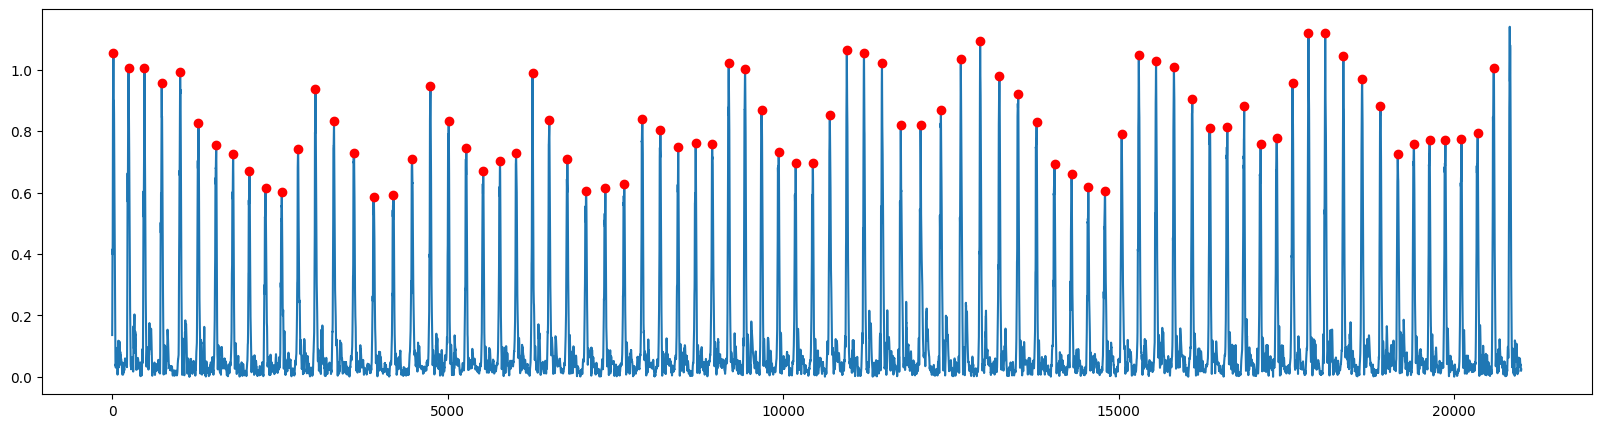

In [ ]:
x = np.arange(len(audio))

plt.figure(figsize=(20, 5))
# plt.plot(audio[:1000])
n = 80
# plt.plot(ecg_1[:30000], color='orange')
# plt.plot(x[r_peaks[:n]], ecg_1[r_peaks[:n]], 'o', color='red')
#plt.plot(ecg_2[n:3000 + n])
plt.plot(audio_see[:21000])
plt.plot(x[s1_peaks[:n]], audio_see[s1_peaks[:n]], 'o', color='red')
plt.show()

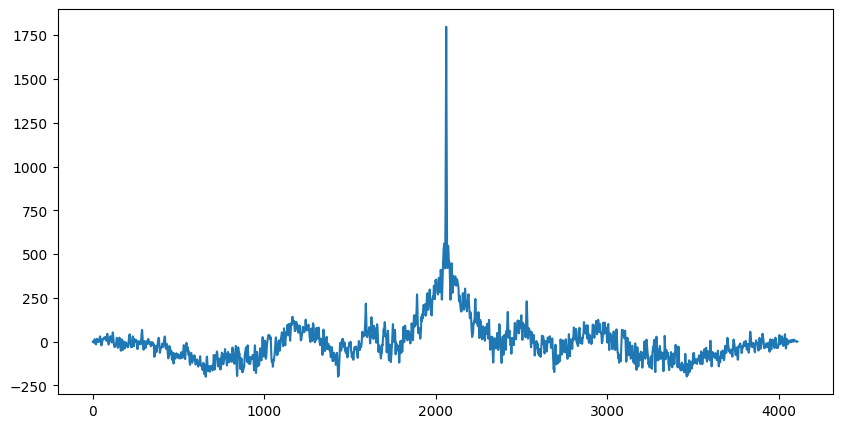

In [51]:
plt.figure(figsize=(10, 5))
plt.plot(xycorr)
plt.show()

In [72]:
np.argmax(xycorr), s1_peaks[63]

(np.int64(2061), np.int64(16618))

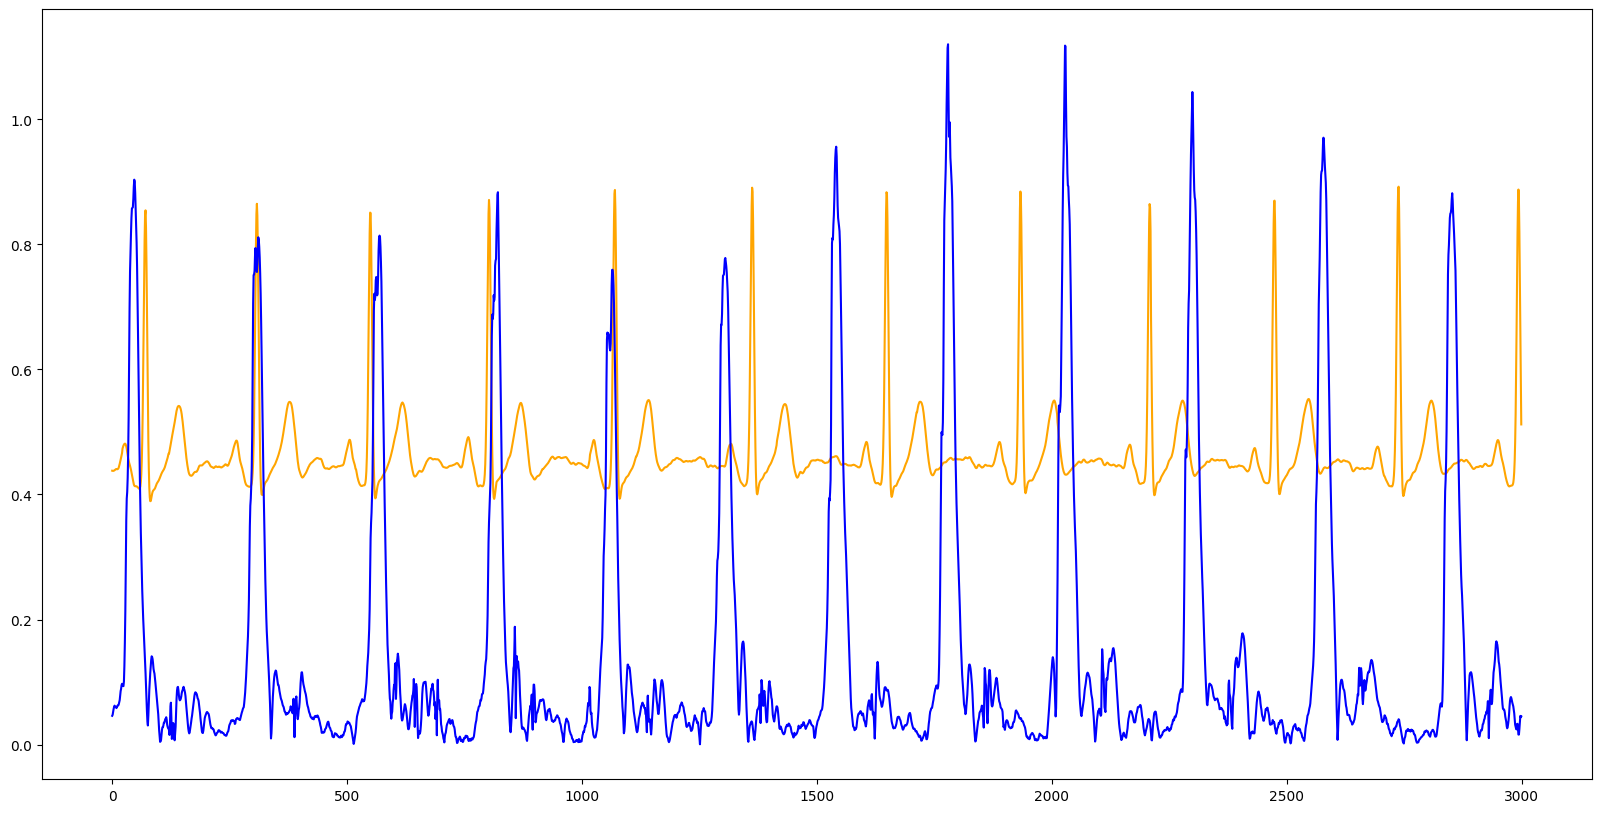

In [75]:
n = 16049
plt.figure(figsize=(20, 10))
plt.plot(ecg_1[498:3000+498], color='orange')
plt.plot(audio_see[n:n+3000], color='blue')
plt.show()

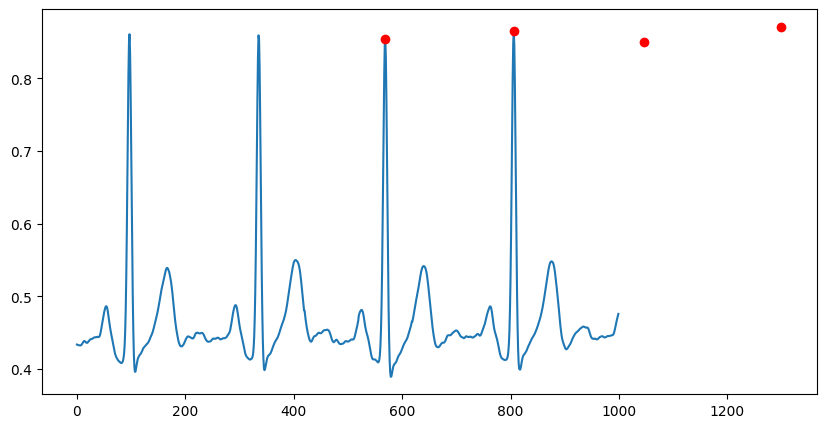

In [63]:
plt.figure(figsize=(10, 5))
plt.plot(ecg_1[:1000])
plt.plot(x[r_peaks[:4]], ecg_1[r_peaks[:4]], 'o', color='red')

In [65]:
np.argmax(ecg_1[500:700])

np.int64(69)

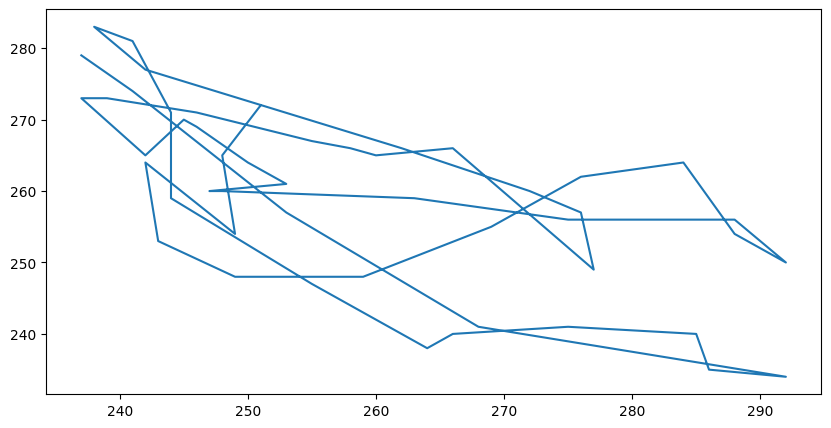

In [98]:
n = 70
plt.figure(figsize=(10, 5))
plt.plot(rr[:50], ss[n:n+50])